### GDP Forecasting using the K-Nearest Neighbor Approach

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [3]:
df = pd.read_csv(r'C:\Users\adim\Desktop\Special Project in Economic Research\Data\US_Forecasting_Data_1972_2021.csv', index_col=0)

##### Data used for the purpose of this analysis is as follows:
##### 1) GDP Growth Rate
##### 2) Unemployment Rate
##### 3) Short-term interest rates(3-Month treasury bills)
##### 4) Long-term interest rates (10-year Government Bond)
##### 5) Consumer Price Index
##### 6) Maunfacturing Utilization 
##### 7) Federal Funds Rate (Proxy for Monetary Policy)

In [4]:
df

,log_gdp,dlog_gdp_yoy,unemp,3m_tbill,d3m_tbill,fedfund,dfed_fund,cpi,dcpi,manu_utilization,10y_bond,d10y_bond
date,,,,,,,,,,,,
1/1/1972,3.720104,NaN,5.766667,3.436667,NaN,3.546667,NaN,6.033333,NaN,81.732967,6.033333,NaN
4/1/1972,3.729852,NaN,5.700000,3.770000,0.333333,4.300000,0.753333,6.143333,0.110000,82.782533,6.143333,0.110000
7/1/1972,3.733934,NaN,5.566667,4.220000,0.450000,4.743333,0.443333,6.290000,0.146667,83.246700,6.290000,0.146667
10/1/1972,3.741146,NaN,5.366667,4.863333,0.643333,5.146667,0.403333,6.373333,0.083333,85.669767,6.373333,0.083333
1/1/1973,3.751763,0.031658,4.933333,5.700000,0.836667,6.536667,1.390000,6.603333,0.230000,87.702233,6.603333,0.230000
...,...,...,...,...,...,...,...,...,...,...,...,...
10/1/2020,4.273413,-0.009941,6.766667,0.093333,-0.020000,0.090000,-0.003333,0.863333,0.213333,74.182667,0.863333,0.213333
1/1/2021,4.280024,0.002369,6.200000,0.050000,-0.043333,0.080000,-0.010000,1.316667,0.453333,74.733533,1.316667,0.453333
4/1/2021,4.287092,0.050096,5.900000,0.026667,-0.023333,0.070000,-0.010000,1.593333,0.276667,75.761367,1.593333,0.276667


#### We believe that the rest of the variables might be good indicators to forecast GDP.

#### But before we delve into our analysis, we have again made sure that our series are stationary. For that reason, we have looked at the levels of the series, conducted dicky-fuller test and then taken the first differences where required.

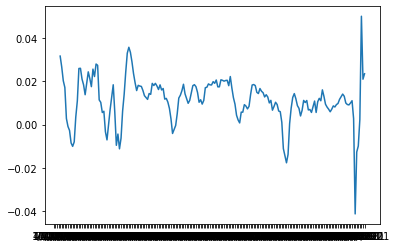

In [5]:
plt.plot(df['dlog_gdp_yoy'])

In [6]:
adfuller(df['unemp'])

(-3.367267081930851,
 0.012126651180138549,
 0,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 441.9842277631707)

In [7]:
adfuller(df['d3m_tbill'].iloc[1:])

(-5.122138365777608,
 1.2651002017360647e-05,
 14,
 184,
 {'1%': -3.466398230774071,
  '5%': -2.8773796387256514,
  '10%': -2.575213838610586},
 342.23586291956434)

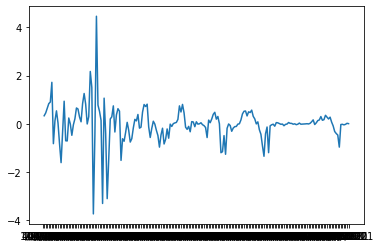

In [8]:
plt.plot(df['d3m_tbill'])

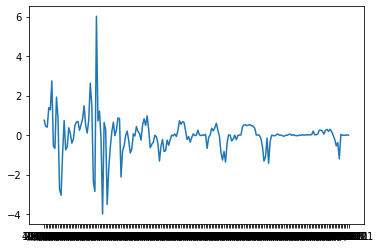

In [9]:
plt.plot(df['dfed_fund'].iloc[1:])

In [10]:
adfuller(df['dfed_fund'].iloc[1:])

(-6.278199349467079,
 3.853902532911971e-08,
 6,
 192,
 {'1%': -3.4648754262570978,
  '5%': -2.876714157488788,
  '10%': -2.574858699001736},
 441.28381782221527)

In [11]:
adfuller(df['dcpi'].iloc[1:])

(-6.571806344884303,
 7.901880384407692e-09,
 6,
 192,
 {'1%': -3.4648754262570978,
  '5%': -2.876714157488788,
  '10%': -2.574858699001736},
 259.99727865392833)

In [12]:
adfuller(df['manu_utilization'])

(-3.614218792676585,
 0.005494941472165006,
 2,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 651.704875637043)

In [13]:
adfuller(df['d10y_bond'].iloc[1:])

(-6.571806344884303,
 7.901880384407692e-09,
 6,
 192,
 {'1%': -3.4648754262570978,
  '5%': -2.876714157488788,
  '10%': -2.574858699001736},
 259.99727865392833)

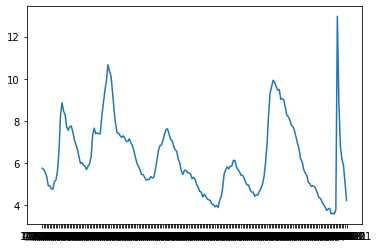

In [17]:
plt.plot(df['unemp'])

In [14]:
model = ARIMA(df['log_gdp'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                log_gdp   No. Observations:                  200
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 761.384
Date:                Thu, 03 Mar 2022   AIC                          -1510.767
Time:                        14:35:49   BIC                          -1491.007
Sample:                    01-01-1972   HQIC                         -1502.770
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0973      0.024      4.023      0.000       0.050       0.145
ar.L2          0.1738      0.058      3.000      0.003       0.060       0.287
ar.L3          0.1355      0.071      1.898      0.0

In [40]:
X=df.drop(["log_gdp", "3m_tbill", "fedfund", "cpi", "10y_bond", "dlog_gdp_yoy"] , axis=1)
X=X.iloc[4:].values
y=df['dlog_gdp_yoy'].iloc[4:]
y

date
1/1/1973     0.031658
4/1/1973     0.026614
7/1/1973     0.020241
10/1/1973    0.017133
1/1/1974     0.002765
               ...   
10/1/2020   -0.009941
1/1/2021     0.002369
4/1/2021     0.050096
7/1/2021     0.020968
10/1/2021    0.023484
Name: dlog_gdp_yoy, Length: 196, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
print(knn_model.predict(X_test))

[-7.38896933e-03 -4.02787367e-03  5.24316567e-03 -2.04840000e-05
  5.05591000e-04  6.54749367e-03  2.60152733e-03  1.58096293e-02
  1.58096293e-02  1.58096293e-02  1.58096293e-02  1.58096293e-02
  1.58096293e-02  1.58096293e-02  2.07459430e-02  1.67080677e-02
  1.82610410e-02  1.26069790e-02  1.71404010e-02  1.57497943e-02
  1.17298173e-02  1.59143757e-02  1.29558427e-02  1.57497943e-02
  1.71404010e-02  1.71404010e-02  1.71404010e-02  1.72240747e-02
  1.82610410e-02  1.71404010e-02  1.38862703e-02  1.57497943e-02
  1.27759953e-02  1.32947720e-02  1.00824910e-02  1.00824910e-02
  1.27759953e-02  1.40149443e-02  1.22520187e-02  1.22520187e-02
  6.55716500e-03  1.07417233e-02 -1.53493323e-02 -7.35650833e-03
  1.10540057e-02  1.68726490e-02  1.82610410e-02  1.17298173e-02
  1.27759953e-02]


In [78]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.00569008721730324

In [77]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.010049527731178858

In [80]:
knn_model.score(X_train, y_train)

0.678510153268048

In [81]:
knn_model.score(X_test, y_test)

0.1559446880726476

In [110]:
test_results=pd.DataFrame(test_preds, y_test.index)
test_results.columns=['Predictions']

In [109]:
z=df['dlog_gdp_yoy'].iloc[151:]

In [114]:
test_results['Actual'] = pd.Series(df['dlog_gdp_yoy'])

In [117]:
test_results['error']=test_results['Actual']-test_results['Predictions']

In [118]:
test_results

,Predictions,Actual,error
date,,,
10/1/2009,-0.007389,0.000354,0.007743
1/1/2010,-0.004028,0.007613,0.011641
4/1/2010,0.005243,0.012531,0.007288
7/1/2010,-0.000020,0.014307,0.014328
10/1/2010,0.000506,0.011944,0.011439
1/1/2011,0.006547,0.008730,0.002183
4/1/2011,0.002602,0.007483,0.004881
7/1/2011,0.015810,0.003970,-0.011840
10/1/2011,0.015810,0.006563,-0.009247


Text(0, 0.5, 'GDP Growth Rate')

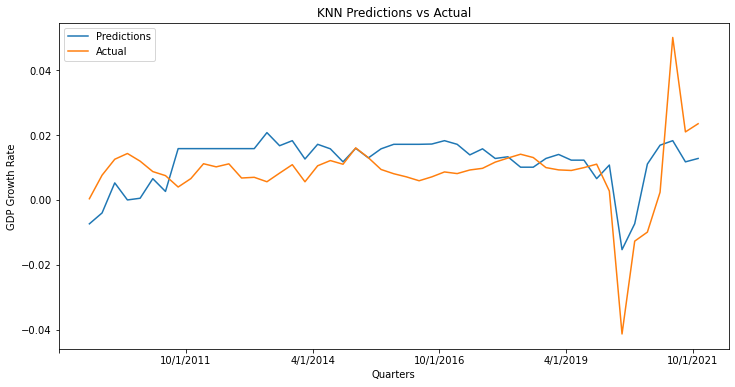

In [174]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(test_results['Predictions'], label='Predictions')
ax.plot(test_results['Actual'], label='Actual')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
ax.legend()
plt.title('KNN Predictions vs Actual')
plt.xlabel('Quarters')
plt.ylabel('GDP Growth Rate')